**The purpose** of this notebook is to perform an Exploratory data analysis (EDA) for TikTok to understand the data before construcing a model for TikTok. Particurly we are intersted in knowing what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and perform Data Visualizations

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Plan Stage

In [2]:
df=pd.read_csv('tiktok_dataset.csv')
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


## Analyze Stage

we will use the following functions to understand the data:

 `.head()`
 `.info()`
 `.describe()`
 `.groupby()`
 `.sort_values()`
 

In [3]:
df.shape

(19382, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


**Checking for Missing Values**

In [5]:
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [24]:
#Checkiing columns
df.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [25]:
#Checking data types 
df.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [22]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


## Construct Stage

We will try to understand the distribiution of the dataset for variables `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count` and `video_comment_count`.We will build the visualizations for the above variables.

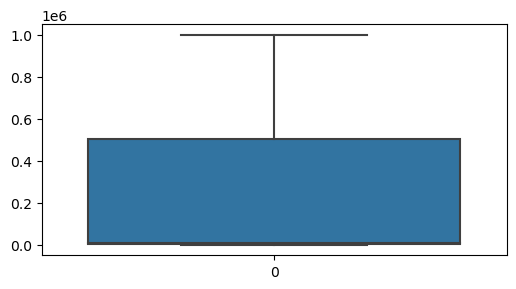

In [53]:
#Data visualization 
plt.figure(figsize=(6,3))
sns.boxplot(df['video_view_count'])
plt.show();

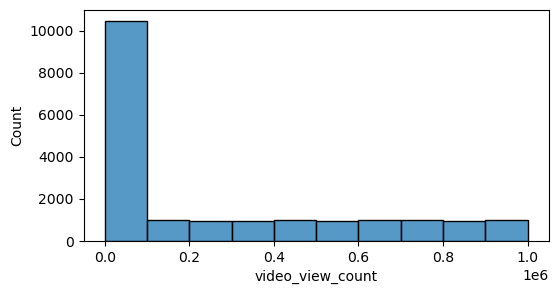

In [55]:
plt.figure(figsize=(6,3))
sns.histplot(df['video_view_count'], bins= range(0,(10**6 +1),10**5))
plt.show();

The data for video view count is right skewed. The majority of the data has views less than 100,000 and the remaining data is equally distributed. 

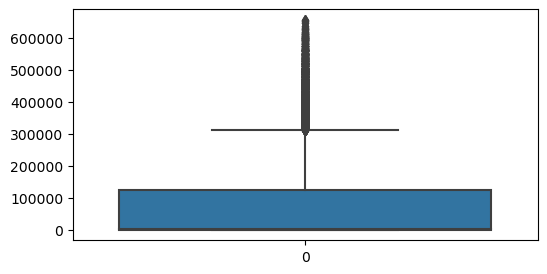

In [57]:
plt.figure(figsize=(6,3))
sns.boxplot(df['video_like_count'])
plt.show();

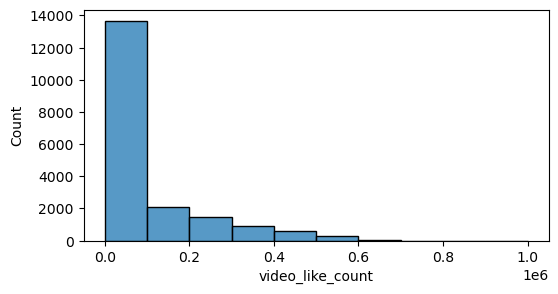

In [58]:
plt.figure(figsize=(6,3))
sns.histplot(df['video_like_count'], bins= range(0,(10**6+1),10**5))
plt.show();

The data is right skewed which means that most of the likes are less than 100,000. very few videos get more than 400,000 likes. 

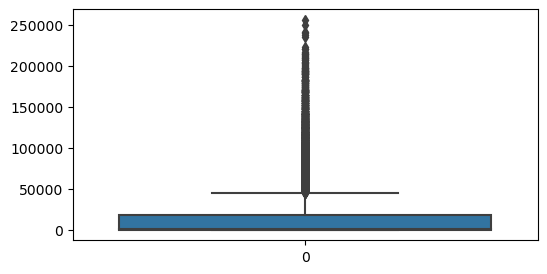

In [60]:
plt.figure(figsize=(6,3))
sns.boxplot(df['video_share_count'])
plt.show();

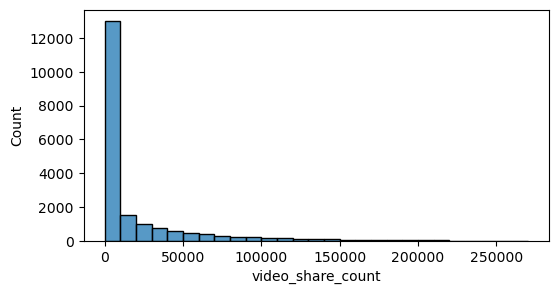

In [61]:
plt.figure(figsize=(6,3))
sns.histplot(df['video_share_count'], bins= range(0, (270001),10000))
plt.show();

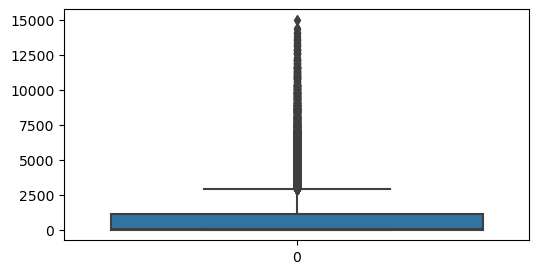

In [62]:
plt.figure(figsize=(6,3))
sns.boxplot(df['video_download_count'])
plt.show();

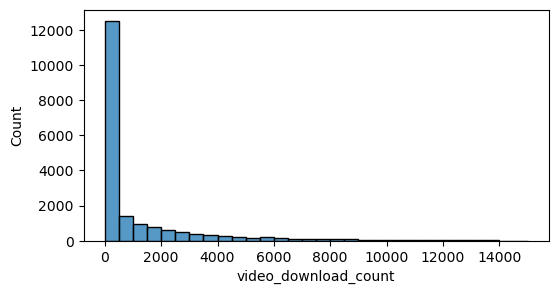

In [63]:
plt.figure(figsize=(6,3))
sns.histplot(df['video_download_count'], bins= range(0,(15001),500))
plt.show();

As we can see from the histogram that the distribution is right skewed and few videos get downloaded more than 2000.

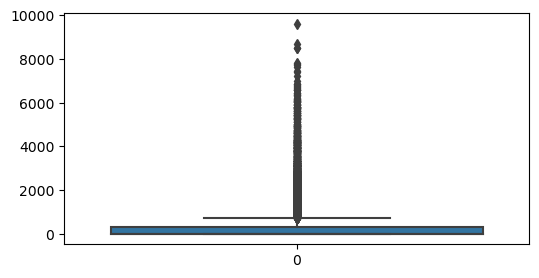

In [64]:
plt.figure(figsize=(6,3))
sns.boxplot(df['video_comment_count'])
plt.show();

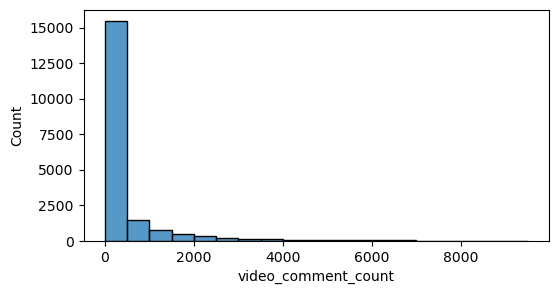

In [65]:
plt.figure(figsize=(6,3))
sns.histplot(df['video_comment_count'], bins= range(0,(10000), 500))
plt.show();

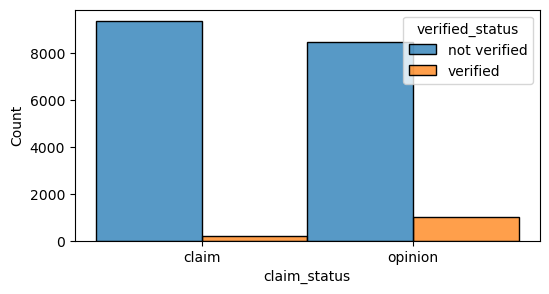

In [66]:
plt.figure(figsize=(6,3))
sns.histplot(data= df, x='claim_status', hue='verified_status', multiple='dodge')
plt.show();

There is a difference in count between the two groups for claim and opinion. The users give more opinion when they are verified than when they are not. 

## Determing Outliers in the data set

As we have seen in the box plot chart that there are outliers in the dataset for some variable such as `video_like_count`, `video_share_count`  so we will have to identify the outliers. This is important because the model we will use will determine weither we will keep the outliers or delete them.

In [42]:
quantile_25 = df['video_like_count'].quantile(0.25)
quantile_75 = df['video_like_count'].quantile(0.75)
iqr = quantile_75 - quantile_25
upper_threshold = quantile_75 + 1.5 * iqr
lower_threshold = quantile_25 - 1.5 *iqr
mask= (df['video_like_count']> upper_threshold) | (df['video_like_count']< lower_threshold)
outliers=df[mask]
outliers.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
12,13,claim,3609761483,51,someone shared with me that the longest record...,not verified,active,700081.0,434565.0,97995.0,2408.0,1411.0
13,14,claim,3850678773,20,someone shared with me that 1920 was the last ...,not verified,under review,929685.0,497236.0,154917.0,1225.0,805.0
27,28,claim,6569363811,22,someone shared with me that sneezing while tra...,not verified,under review,812056.0,329068.0,3515.0,5200.0,1108.0
28,29,claim,6301836558,21,someone shared with me that people don’t sneez...,not verified,active,677855.0,332569.0,97961.0,5531.0,2386.0


We can find the total number of outliers in each variables also

In [37]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (df[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


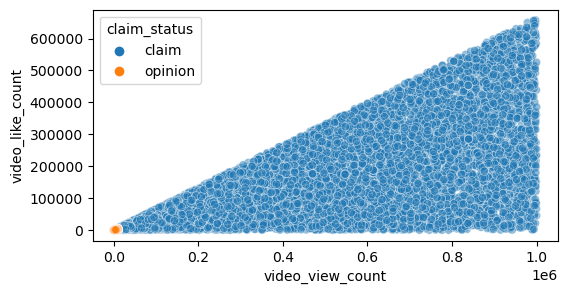

In [67]:
#Creating a scatter plot 
plt.figure(figsize=(6,3))
sns.scatterplot(x='video_view_count', y='video_like_count', hue='claim_status',data=df, alpha= 0.5)
plt.show();

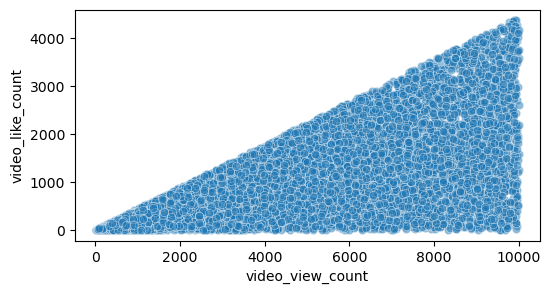

In [68]:
#Create a scatter plot for opinions only 
plt.figure(figsize=(6,3))
opinion=df[df['claim_status']=='opinion']
sns.scatterplot(x='video_view_count', y='video_like_count', data=opinion, alpha=0.5)
plt.show();

## Pace Execute 

I examined the data distribution/spread, count frequencies, mean and median values, extreme values/outliers, missing data, and more. I analyzed correlations between variables, particularly between the claim_status variable and others.


**EDA** has helped me to understan the data before creating the model such as how to deal with the missing values, identifying the outliers and what to do with the duplicates. visualizations also helped me to understand the data